In [1]:
import turicreate as tc

# load music data

In [2]:
song_data = tc.SFrame("song_data.sframe\song_data.sframe\m_cccc16853452d1ed.frame_idx")

# Explore data

In [3]:
song_data

user_id,song_id,listen_count,title,artist
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOAKIMP12A8C130995,1,The Cove,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBXHDL12A81C204C0,1,Stronger,Kanye West
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODDNQT12A6D4F5F7E,5,Apuesta Por El Rock 'N'Roll ...,Héroes del Silencio
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SODXRTY12AB0180F3B,1,Paper Gangsta,Lady GaGa
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFGUAY12AB017B0A8,1,Stacked Actors,Foo Fighters
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOFRQTD12A81C233C0,1,Sehr kosmisch,Harmonia
b80344d063b5ccb3212f76538f3d9e43d87dca9e ...,SOHQWYZ12A6D4FA701,1,Heaven's gonna burn youreyes ...,Thievery Corporationfeat. Emiliana Torrini ...


In [4]:
len(song_data)

1116609

In [5]:
song_data['song'].show()

Materializing SArray

## count number of users

In [7]:
users = song_data['user_id'].unique()

In [8]:
len(users)

66346

In [9]:
users.head()

dtype: str
Rows: 10
['279292bb36dbfc7f505e36ebf038c81eb1d1d63e', 'c067c22072a17d33310d7223d7b79f819e48cf42', '696787172dd3f5169dc94deef97e427cee86147d', '532e98155cbfd1e1a474a28ed96e59e50f7c5baf', '18325842a941bc58449ee71d659a08d1c1bd2383', '507433946f534f5d25ad1be302edb9a2376f503c', '18fafad477f9d72ff86f7d0bd838a6573de0f64a', 'fe85b96ba1983219b296f6b4869dd29eb2b72ff9', '225ea420b4bede50919d1bfe24a599691522d176', '95dc7e2b188b1148b2d25f4e6b6e94afacc4efc3']

# create a song recommender

In [10]:
train_data, test_data = song_data.random_split(0.8, seed = 0)

## simple popularity-based recommender

In [11]:
popularity_model = tc.popularity_recommender.create(train_data, 
                                                   user_id='user_id',
                                                   item_id='song')

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 0.526954s

893580 observations to process; with 9952 unique items.

### use popularity model to make some predictions

In [12]:
popularity_model.recommend(users=[users[0]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sehr kosmisch - Harmonia,4754.0,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Undo - Björk,4227.0,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,You're The One - DwightYoakam ...,3781.0,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Revelry - Kings Of Leon,3527.0,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Secrets - OneRepublic,3148.0,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Hey_ Soul Sister - Train,2538.0,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Fireflies - CharttraxxKaraoke ...,2532.0,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Tive Sim - Cartola,2521.0,10


In [13]:
popularity_model.recommend(users=[users[1]])

user_id,song,score,rank
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Sehr kosmisch - Harmonia,4754.0,1
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Undo - Björk,4227.0,2
c067c22072a17d33310d7223d7b79f819e48cf42 ...,You're The One - DwightYoakam ...,3781.0,3
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Dog Days Are Over (RadioEdit) - Florence + The ...,3633.0,4
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Revelry - Kings Of Leon,3527.0,5
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Horn Concerto No. 4 in Eflat K495: II. Romance ...,3161.0,6
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Secrets - OneRepublic,3148.0,7
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Hey_ Soul Sister - Train,2538.0,8
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Fireflies - CharttraxxKaraoke ...,2532.0,9
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Tive Sim - Cartola,2521.0,10


## Build a song recommender with personlaization

In [14]:
personalize_model = tc.item_similarity_recommender.create(train_data,
                                                         user_id='user_id',
                                                         item_id='song')

Warning: Ignoring columns song_id, listen_count, title, artist;

To use one of these as a rating column, specify the column name to be used as target

and use a method that allows the use of a target.

Preparing data set.

Data has 893580 observations with 66085 users and 9952 items.

Data prepared in: 0.531264s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 996us                          | 1.5        |

| 19.832ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 487.05ms                            | 0                | 13              |

| 1.04s                               | 100              | 9952            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 2.13814s

### Applying the personalize model to make song recommendataions

In [15]:
personalize_model.recommend(users=[users[0]])

user_id,song,score,rank
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Riot In Cell Block NumberNine - Dr Feelgood ...,0.03749999403953552,1
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Sei Lá Mangueira -Elizeth Cardoso ...,0.03316326439380646,2
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,The Stallion - Ween,0.032258063554763794,3
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Rain - Subhumans,0.031415924429893494,4
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,West One (Shine On Me) -The Ruts ...,0.030677199363708496,5
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Back Against The Wall -Cage The Elephant ...,0.030120477080345154,6
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Life Less Frightening -Rise Against ...,0.0284431129693985,7
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,A Beggar On A Beach OfGold - Mike And The ...,0.023002490401268005,8
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Audience Of One - RiseAgainst ...,0.01939384639263153,9
279292bb36dbfc7f505e36ebf038c81eb1d1d63e ...,Blame It On The Boogie -The Jacksons ...,0.018987342715263367,10


In [16]:
personalize_model.recommend(users=[users[1]])

user_id,song,score,rank
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Grind With Me (ExplicitVersion) - Pretty Ricky ...,0.04594243764877319,1
c067c22072a17d33310d7223d7b79f819e48cf42 ...,There Goes My Baby -Usher ...,0.03319207429885864,2
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Panty Droppa [Intro](Album Version) - Trey ...,0.03185662031173706,3
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Nobody (Featuring AthenaCage) (LP Version) - ...,0.027846765518188477,4
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Youth Against Fascism -Sonic Youth ...,0.026291418075561523,5
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Nice & Slow - Usher,0.023963940143585206,6
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Making Love (Into TheNight) - Usher ...,0.023817694187164305,7
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Naked - Marques Houston,0.022892570495605467,8
c067c22072a17d33310d7223d7b79f819e48cf42 ...,I.nner Indulgence -DESTRUCTION ...,0.022076749801635744,9
c067c22072a17d33310d7223d7b79f819e48cf42 ...,Love Lost (Album Version)- Trey Songz ...,0.020449769496917725,10


In [18]:
personalize_model.get_similar_items(['With Or Without You - U2'])

song,similar,score,rank
With Or Without You - U2,I Still Haven't FoundWhat I'm Looking For ...,0.04285717010498047,1
With Or Without You - U2,Hold Me_ Thrill Me_ KissMe_ Kill Me - U2 ...,0.033734917640686035,2
With Or Without You - U2,Window In The Skies - U2,0.03283584117889404,3
With Or Without You - U2,Vertigo - U2,0.03007519245147705,4
With Or Without You - U2,Sunday Bloody Sunday - U2,0.02713179588317871,5
With Or Without You - U2,Bad - U2,0.02517986297607422,6
With Or Without You - U2,A Day Without Me - U2,0.023715436458587646,7
With Or Without You - U2,Another Time AnotherPlace - U2 ...,0.020325183868408203,8
With Or Without You - U2,Walk On - U2,0.020202040672302246,9
With Or Without You - U2,Get On Your Boots - U2,0.019685029983520508,10


In [20]:
personalize_model.get_similar_items(['Chan Chan (Live) - Buena Vista Social Club'])

song,similar,score,rank
Chan Chan (Live) - BuenaVista Social Club ...,Murmullo - Buena VistaSocial Club ...,0.1881188154220581,1
Chan Chan (Live) - BuenaVista Social Club ...,La Bayamesa - Buena VistaSocial Club ...,0.1871921420097351,2
Chan Chan (Live) - BuenaVista Social Club ...,Amor de Loca Juventud -Buena Vista Social Club ...,0.18483412265777588,3
Chan Chan (Live) - BuenaVista Social Club ...,Diferente - Gotan Project,0.021459221839904785,4
Chan Chan (Live) - BuenaVista Social Club ...,Mistica - Orishas,0.020576119422912598,5
Chan Chan (Live) - BuenaVista Social Club ...,Hotel California - GipsyKings ...,0.019304990768432617,6
Chan Chan (Live) - BuenaVista Social Club ...,Nací Orishas - Orishas,0.019157111644744873,7
Chan Chan (Live) - BuenaVista Social Club ...,Le Moulin - Yann Tiersen,0.018796980381011963,8
Chan Chan (Live) - BuenaVista Social Club ...,Gitana - Willie Colon,0.018796980381011963,9
Chan Chan (Live) - BuenaVista Social Club ...,Criminal - Gotan Project,0.018779337406158447,10


 # Quantitative comparison between the models.

In [43]:
# %matplotlib inline
'''user_sample=0.05'''
model_performance = tc.recommender.util.compare_models(test_data,
                                                      [popularity_model,personalize_model])

PROGRESS: Evaluate model M0


recommendations finished on 1000/58628 queries. users per second: 28427.7

recommendations finished on 2000/58628 queries. users per second: 32323.2

recommendations finished on 3000/58628 queries. users per second: 33877.3

recommendations finished on 4000/58628 queries. users per second: 34414.5

recommendations finished on 5000/58628 queries. users per second: 34121.5

recommendations finished on 6000/58628 queries. users per second: 33316.7

recommendations finished on 7000/58628 queries. users per second: 33466.2

recommendations finished on 8000/58628 queries. users per second: 33593.3

recommendations finished on 9000/58628 queries. users per second: 33529.2

recommendations finished on 10000/58628 queries. users per second: 33603.6

recommendations finished on 11000/58628 queries. users per second: 33095.6

recommendations finished on 12000/58628 queries. users per second: 32727.9

recommendations finished on 13000/58628 queries. users per second: 32952.1

recommendations finished on 14000/58628 queries. users per second: 33096.9

recommendations finished on 15000/58628 queries. users per second: 32854.1

recommendations finished on 16000/58628 queries. users per second: 32848.2

recommendations finished on 17000/58628 queries. users per second: 32747.2

recommendations finished on 18000/58628 queries. users per second: 32936.1

recommendations finished on 19000/58628 queries. users per second: 31906.4

recommendations finished on 20000/58628 queries. users per second: 31704.4

recommendations finished on 21000/58628 queries. users per second: 31687.8

recommendations finished on 22000/58628 queries. users per second: 31752.8

recommendations finished on 23000/58628 queries. users per second: 31754.6

recommendations finished on 24000/58628 queries. users per second: 31730.5

recommendations finished on 25000/58628 queries. users per second: 31772.3

recommendations finished on 26000/58628 queries. users per second: 31672.6

recommendations finished on 27000/58628 queries. users per second: 31677.9

recommendations finished on 28000/58628 queries. users per second: 31720.2

recommendations finished on 29000/58628 queries. users per second: 31738.4

recommendations finished on 30000/58628 queries. users per second: 31534.5

recommendations finished on 31000/58628 queries. users per second: 31393.8

recommendations finished on 32000/58628 queries. users per second: 31206.7

recommendations finished on 33000/58628 queries. users per second: 31028.9

recommendations finished on 34000/58628 queries. users per second: 30959.4

recommendations finished on 35000/58628 queries. users per second: 31052.9

recommendations finished on 36000/58628 queries. users per second: 31110

recommendations finished on 37000/58628 queries. users per second: 31229.1

recommendations finished on 38000/58628 queries. users per second: 31102.1

recommendations finished on 39000/58628 queries. users per second: 31057

recommendations finished on 40000/58628 queries. users per second: 30981.9

recommendations finished on 41000/58628 queries. users per second: 30899.4

recommendations finished on 42000/58628 queries. users per second: 30829

recommendations finished on 43000/58628 queries. users per second: 30777.2

recommendations finished on 44000/58628 queries. users per second: 30758.3

recommendations finished on 45000/58628 queries. users per second: 30747.1

recommendations finished on 46000/58628 queries. users per second: 30729.7

recommendations finished on 47000/58628 queries. users per second: 30764.7

recommendations finished on 48000/58628 queries. users per second: 30796.6

recommendations finished on 49000/58628 queries. users per second: 30748.6

recommendations finished on 50000/58628 queries. users per second: 30705.8

recommendations finished on 51000/58628 queries. users per second: 30756.7

recommendations finished on 52000/58628 queries. users per second: 30844.9

recommendations finished on 53000/58628 queries. users per second: 30851.6

recommendations finished on 54000/58628 queries. users per second: 30658.5

recommendations finished on 55000/58628 queries. users per second: 30543.4

recommendations finished on 56000/58628 queries. users per second: 30306.9

recommendations finished on 57000/58628 queries. users per second: 30157

recommendations finished on 58000/58628 queries. users per second: 29934.3


Precision and recall summary statistics by cutoff


+--------+----------------------+----------------------+
| cutoff |    mean_precision    |     mean_recall      |
+--------+----------------------+----------------------+
|   1    | 0.028331172818448526 | 0.007492220445288924 |
|   2    | 0.027222487548611594 | 0.014795267425410074 |
|   3    | 0.024783379954969986 | 0.019985345559090317 |
|   4    | 0.023005219349116424 | 0.02440571341089155  |
|   5    |  0.0210445520911519  | 0.02776006405080688  |
|   6    | 0.020018876077414635 | 0.031818614883008356 |
|   7    | 0.01892318638583201  | 0.03513253370693221  |
|   8    | 0.018005475199563383 | 0.03821129823116654  |
|   9    | 0.01712113286787385  | 0.04081908418010376  |
|   10   | 0.016410247663233398 | 0.04350596069006804  |
+--------+----------------------+----------------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1


recommendations finished on 1000/58628 queries. users per second: 26182.1

recommendations finished on 2000/58628 queries. users per second: 29374.6

recommendations finished on 3000/58628 queries. users per second: 30215.4

recommendations finished on 4000/58628 queries. users per second: 30317.5

recommendations finished on 5000/58628 queries. users per second: 30308.2

recommendations finished on 6000/58628 queries. users per second: 30302

recommendations finished on 7000/58628 queries. users per second: 30260.8

recommendations finished on 8000/58628 queries. users per second: 29828.4

recommendations finished on 9000/58628 queries. users per second: 29335.4

recommendations finished on 10000/58628 queries. users per second: 28735.1

recommendations finished on 11000/58628 queries. users per second: 27640.8

recommendations finished on 12000/58628 queries. users per second: 26893.6

recommendations finished on 13000/58628 queries. users per second: 26477.2

recommendations finished on 14000/58628 queries. users per second: 26383.7

recommendations finished on 15000/58628 queries. users per second: 26077.8

recommendations finished on 16000/58628 queries. users per second: 25824.8

recommendations finished on 17000/58628 queries. users per second: 25758.9

recommendations finished on 18000/58628 queries. users per second: 25449.9

recommendations finished on 19000/58628 queries. users per second: 25363.8

recommendations finished on 20000/58628 queries. users per second: 25146.8

recommendations finished on 21000/58628 queries. users per second: 24831.8

recommendations finished on 22000/58628 queries. users per second: 24664.3

recommendations finished on 23000/58628 queries. users per second: 24505.2

recommendations finished on 24000/58628 queries. users per second: 24498.9

recommendations finished on 25000/58628 queries. users per second: 24493.8

recommendations finished on 26000/58628 queries. users per second: 24577.1

recommendations finished on 27000/58628 queries. users per second: 24651.8

recommendations finished on 28000/58628 queries. users per second: 24838.2

recommendations finished on 29000/58628 queries. users per second: 24993

recommendations finished on 30000/58628 queries. users per second: 25127.4

recommendations finished on 31000/58628 queries. users per second: 25070.4

recommendations finished on 32000/58628 queries. users per second: 25113.1

recommendations finished on 33000/58628 queries. users per second: 25168.6

recommendations finished on 34000/58628 queries. users per second: 25284.7

recommendations finished on 35000/58628 queries. users per second: 25414.9

recommendations finished on 36000/58628 queries. users per second: 25532.5

recommendations finished on 37000/58628 queries. users per second: 25622.5

recommendations finished on 38000/58628 queries. users per second: 25741.4

recommendations finished on 39000/58628 queries. users per second: 25788

recommendations finished on 40000/58628 queries. users per second: 25910.7

recommendations finished on 41000/58628 queries. users per second: 25989.4

recommendations finished on 42000/58628 queries. users per second: 26009.2

recommendations finished on 43000/58628 queries. users per second: 26069.1

recommendations finished on 44000/58628 queries. users per second: 26145.6

recommendations finished on 45000/58628 queries. users per second: 26187.3

recommendations finished on 46000/58628 queries. users per second: 26247.3

recommendations finished on 47000/58628 queries. users per second: 26339.4

recommendations finished on 48000/58628 queries. users per second: 26395.1

recommendations finished on 49000/58628 queries. users per second: 26500.2

recommendations finished on 50000/58628 queries. users per second: 26565.2

recommendations finished on 51000/58628 queries. users per second: 26624.9

recommendations finished on 52000/58628 queries. users per second: 26695

recommendations finished on 53000/58628 queries. users per second: 26715.6

recommendations finished on 54000/58628 queries. users per second: 26762.1

recommendations finished on 55000/58628 queries. users per second: 26810.5

recommendations finished on 56000/58628 queries. users per second: 26868.6

recommendations finished on 57000/58628 queries. users per second: 26872.1

recommendations finished on 58000/58628 queries. users per second: 26793.2


Precision and recall summary statistics by cutoff


+--------+---------------------+---------------------+
| cutoff |    mean_precision   |     mean_recall     |
+--------+---------------------+---------------------+
|   1    | 0.19096677355529787 | 0.05962132850568773 |
|   2    | 0.16125400832366837 | 0.09581137610814457 |
|   3    | 0.14076323031088633 | 0.12179843788320335 |
|   4    |  0.1258954765640995 |  0.1428264806880071 |
|   5    | 0.11398307975711226 |  0.1596608255712118 |
|   6    | 0.10456892042482513 | 0.17460465215302287 |
|   7    |  0.0969843760660434 | 0.18811537918535842 |
|   8    | 0.09069898342089111 |  0.2002091795535954 |
|   9    | 0.08534223313850821 | 0.21109648915886922 |
|   10   | 0.08072252166200503 | 0.22094076570632948 |
+--------+---------------------+---------------------+
[10 rows x 3 columns]



In [44]:
model_performance[0]['precision_recall_overall']

cutoff,precision,recall
1,0.028331172818448522,0.007492220445288925
2,0.027222487548611576,0.014795267425410073
3,0.024783379954969986,0.01998534555909024
4,0.023005219349116483,0.02440571341089153
5,0.021044552091151927,0.027760064050806894
6,0.020018876077414552,0.03181861488300796
7,0.018923186385832038,0.035132533706932215
8,0.018005475199563373,0.038211298231166584
9,0.017121132867873957,0.04081908418010369
10,0.016410247663233478,0.04350596069006815


In [27]:
import matplotlib.pyplot as plt

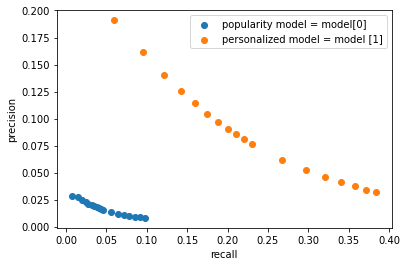

In [45]:
plt.scatter(model_performance[0]['precision_recall_overall']['recall'],
             model_performance[0]['precision_recall_overall']['precision'],
             label= "popularity model = model[0]")
plt.scatter(model_performance[1]['precision_recall_overall']['recall'],
             model_performance[1]['precision_recall_overall']['precision'],
             label='personalized model = model [1]')
plt.xlabel('recall') # labels the x-axis
plt.ylabel('precision') # labels the y-axis
plt.legend() # adds the legend according to labels above in plt.plot(model.....)
plt.show()